In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',200)
import warnings
warnings.filterwarnings('ignore')

In [2]:
previous = pd.read_csv(r"previous_app.csv")


In [3]:
previous.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
previous.shape

(1670214, 37)

In [5]:
previous.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [6]:
len(previous)

1670214

In [7]:
previous.isnull().sum()/len(previous)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [8]:
previous = previous.drop(columns = ["SK_ID_CURR"])
previous.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
previous.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [10]:
cl = previous.loc[:,list((100*(previous.isnull().sum()/len(previous.index)) >= 50))].columns 
#Dropping columns with more than 50 percent of missing values
previous = previous.drop(cl, axis=1)
previous.shape

(1670214, 32)

In [11]:
previous.dtypes

SK_ID_PREV                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [12]:
previous.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
categorical_columns = previous.select_dtypes(include=['object'])
print("Categorical Columns:")
print(categorical_columns.columns)


Categorical Columns:
Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [14]:
continuous_columns = previous.select_dtypes(include=[np.number])
print("Continuous Columns:")
print(continuous_columns.columns)

Continuous Columns:
Index(['SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def unnivariate_cat(variable):
    for var in variable:
        plt.figure(figsize=(10,6))

        # Create the count plot using seaborn
        sns.countplot(x=var, data=previous, order=previous[var].value_counts().index)

        # Add count labels to the bars
        for p in plt.gca().patches:
            height = p.get_height()
            plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                               ha='center', va='bottom', fontsize=10)

        # Add labels and title
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Analysis of ' + var, weight='heavy', fontsize=20)

        # Create the table
        counts = previous[var].value_counts()
        table_data = pd.DataFrame({'Value': counts.index, 'Count': counts.values})
        table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='right')
        table.scale(1.5, 1.5)  # Adjust the table size as needed
        
        # Remove the table axis
        plt.axis('off')

        # Adjust the layout
        plt.tight_layout()

        # Show the plot
        plt.show()

 

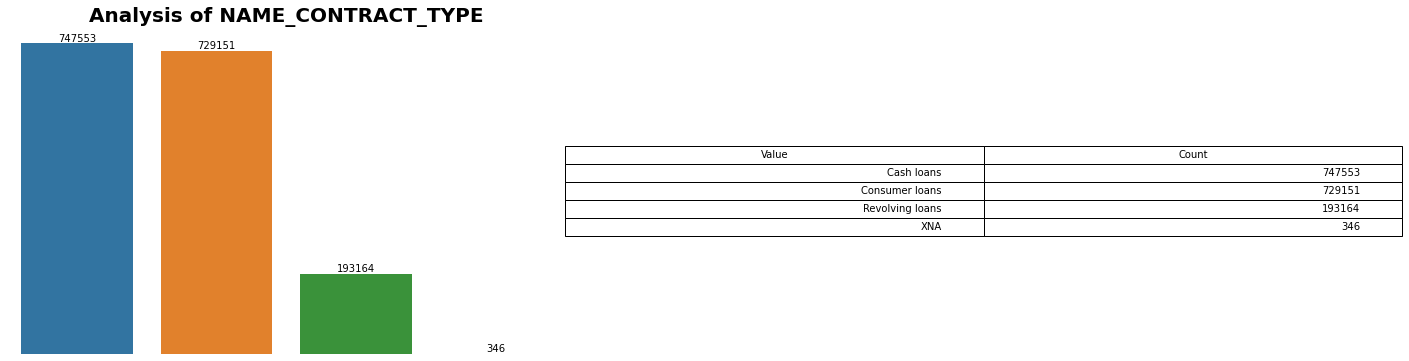

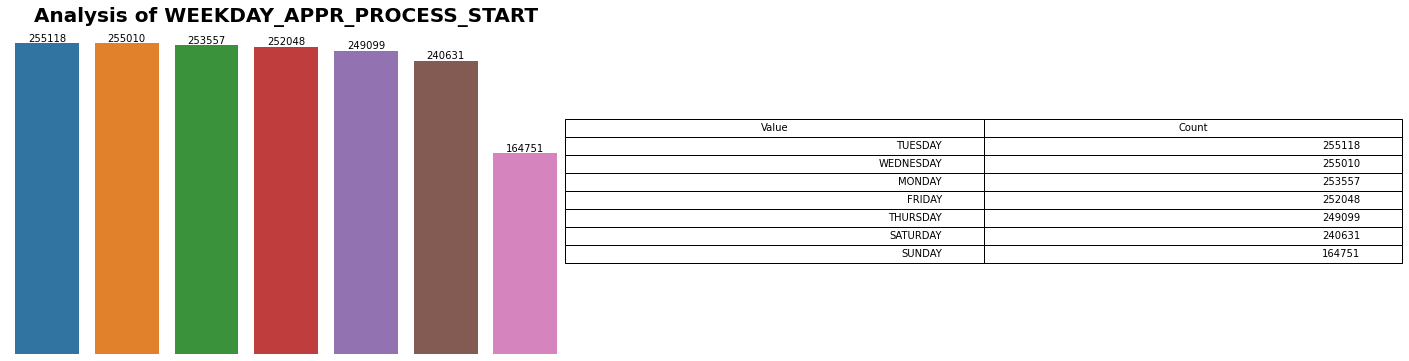

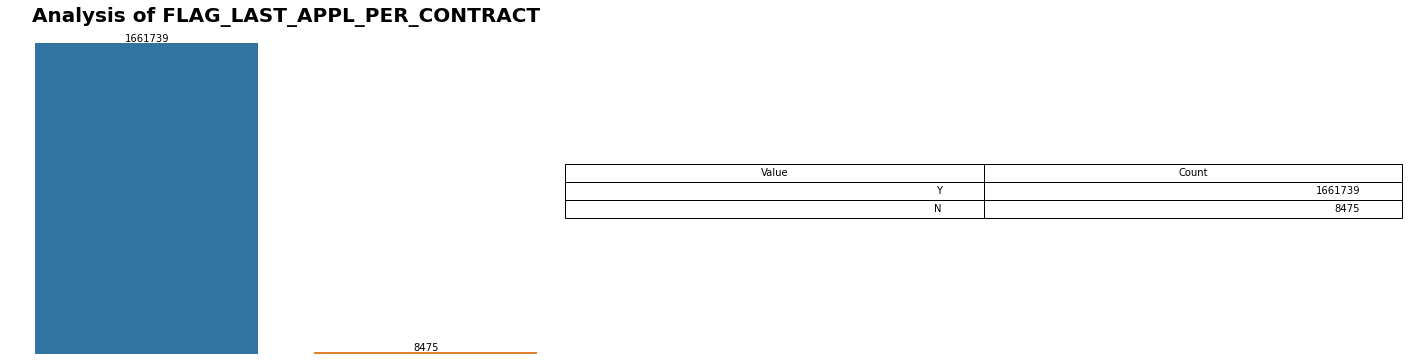

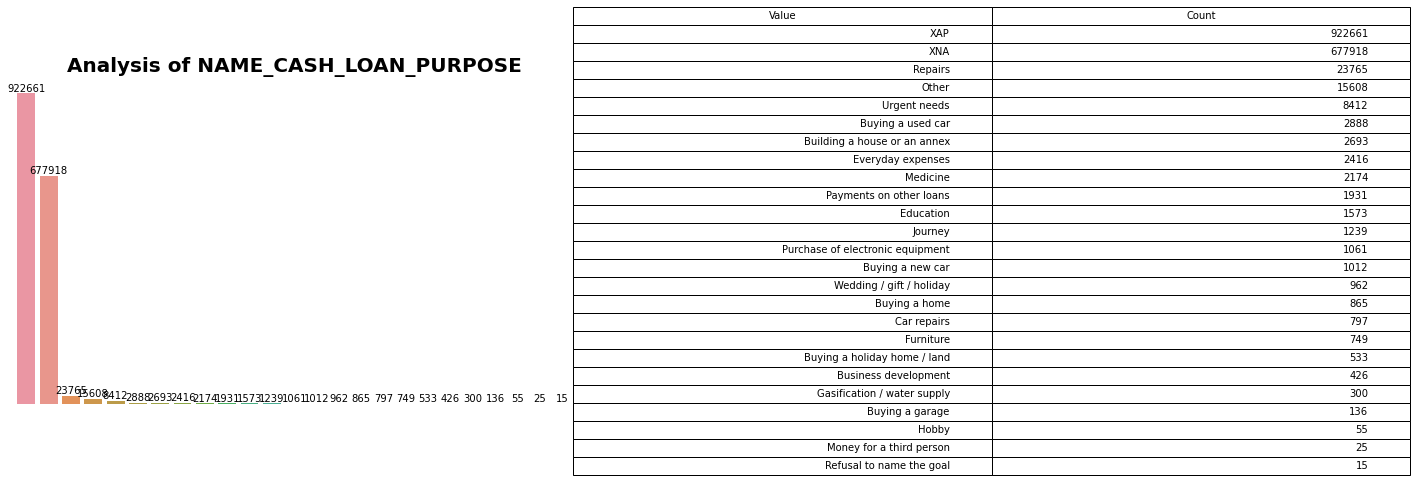

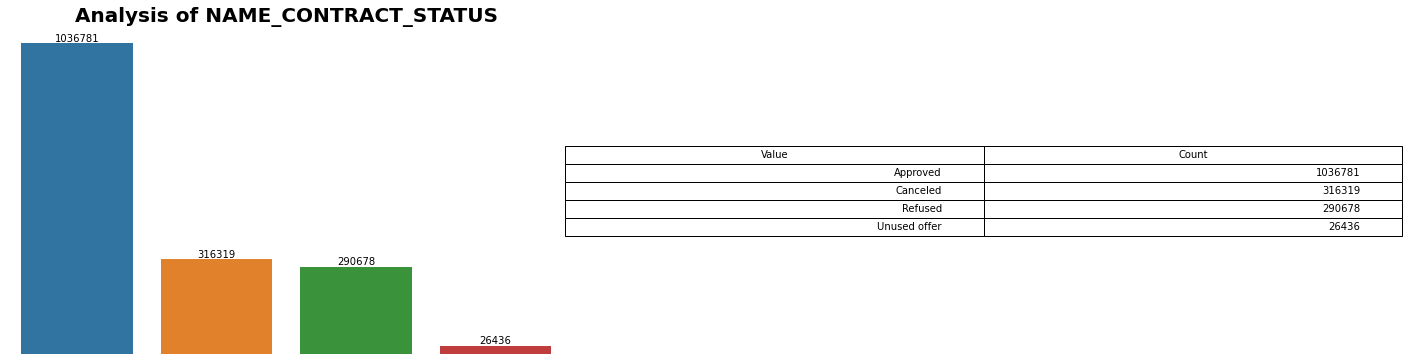

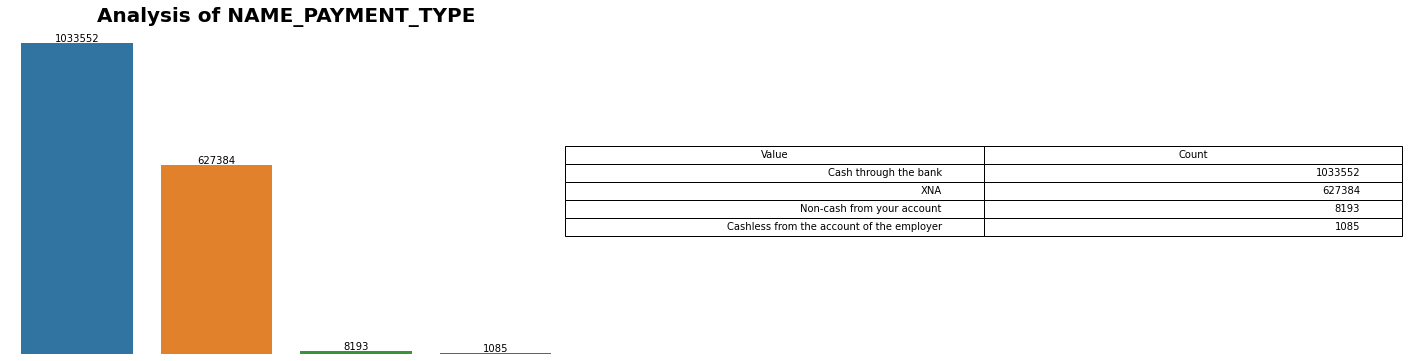

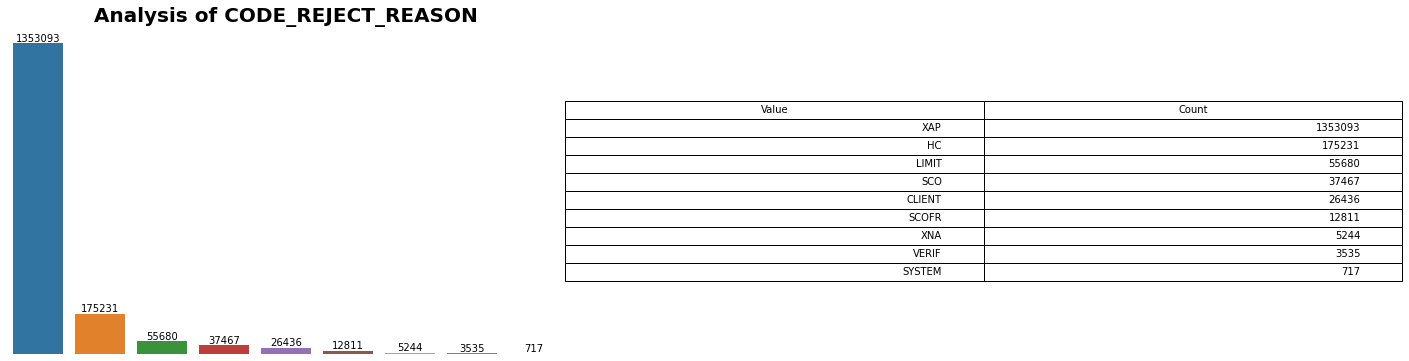

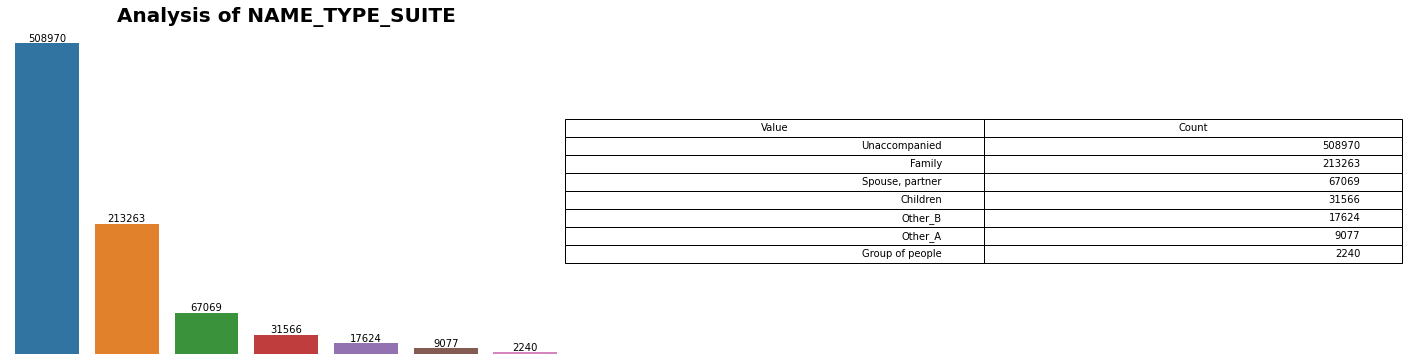

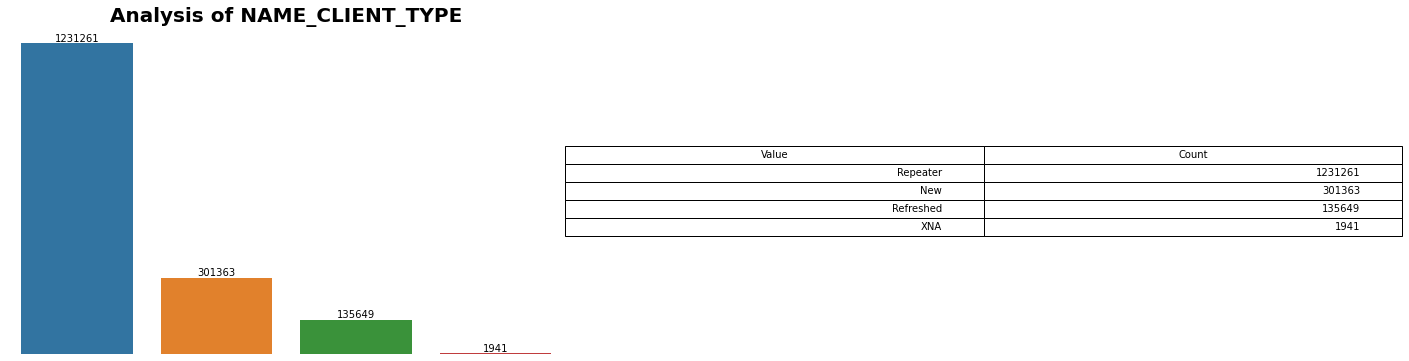

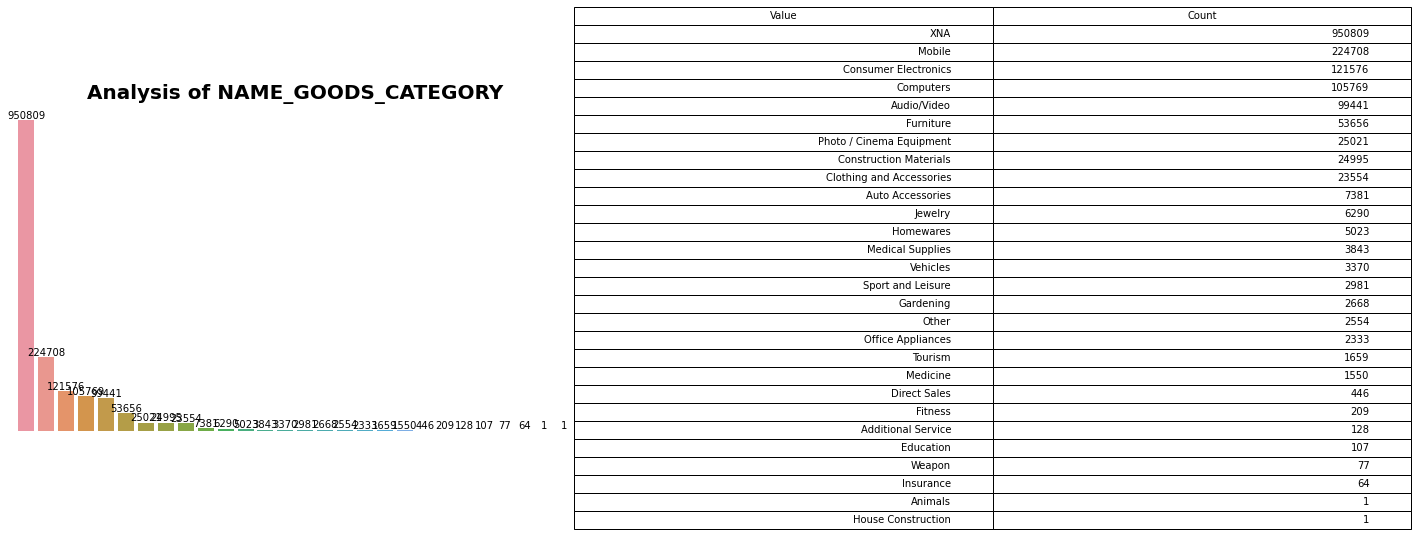

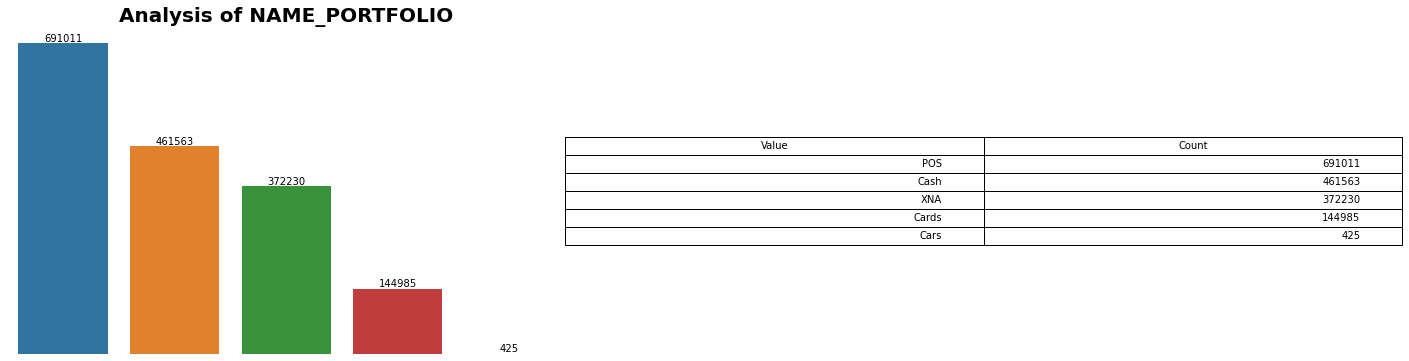

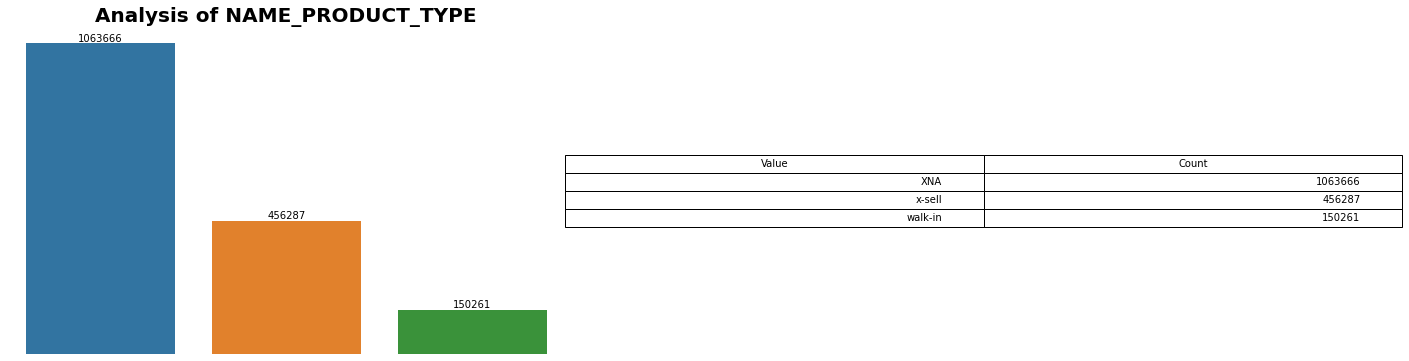

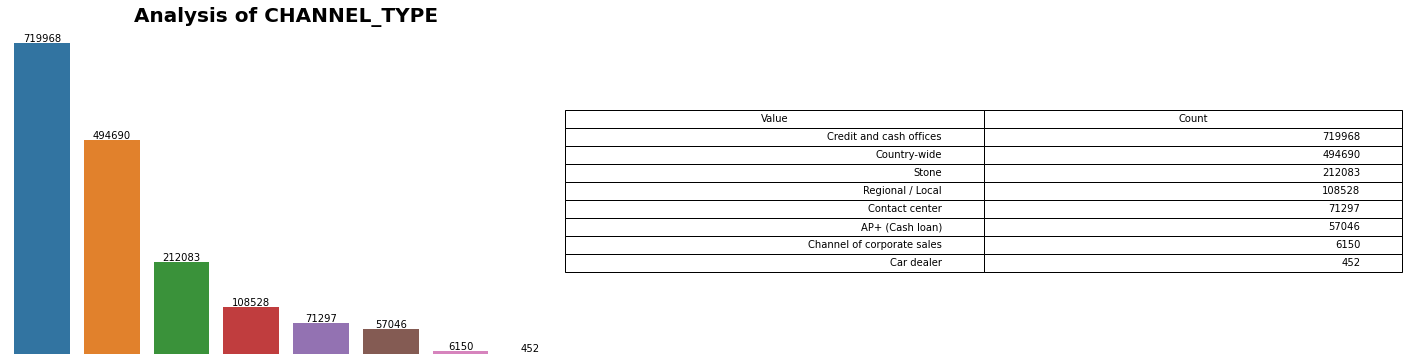

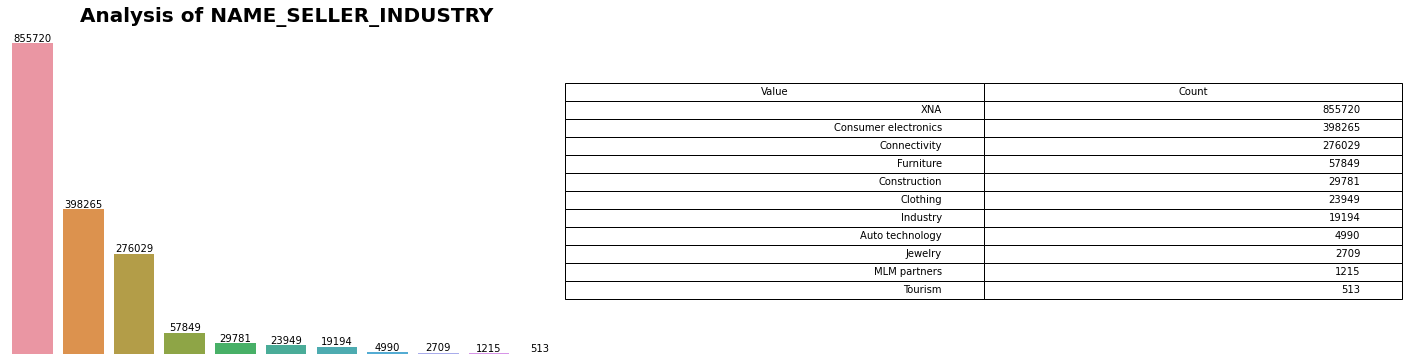

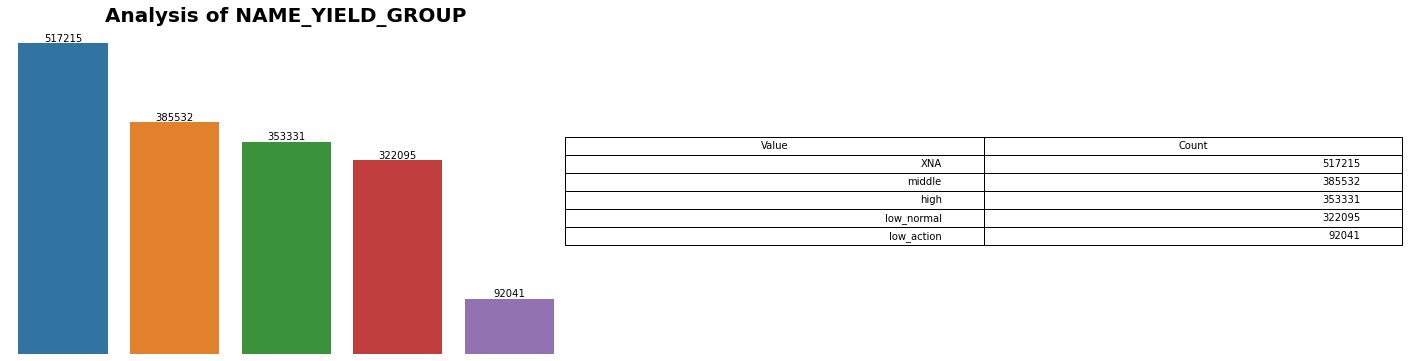

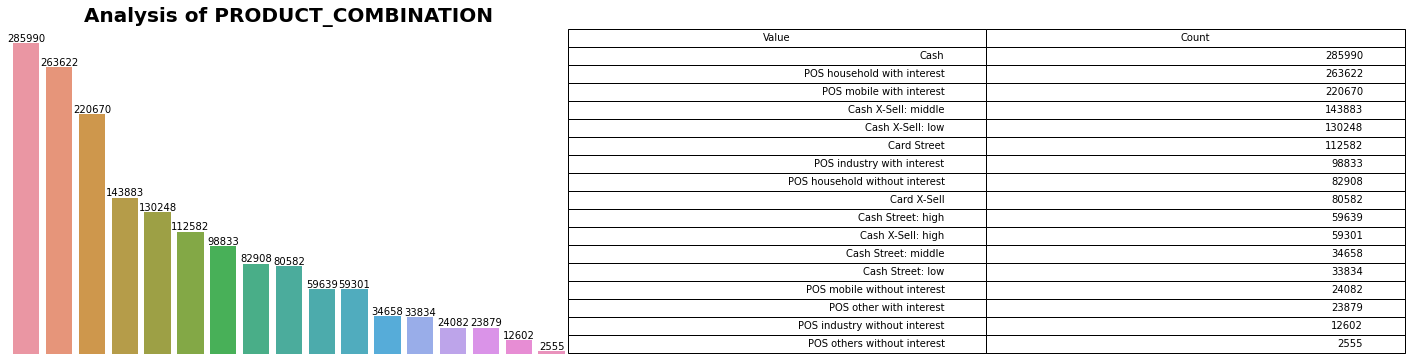

In [16]:
unnivariate_cat(categorical_columns.columns)

In [17]:
def unnivariate_cont(var):
    for variable in var:
        plt.figure(figsize=(12,6))
        sns.distplot(previous[variable],color='tab:blue')
        plt.title('Distribution of '+ '%s' %variable, weight='heavy', fontsize=15)
        plt.xlabel(variable)
        plt.ylabel('Normal distribution for clients')
        plt.show()

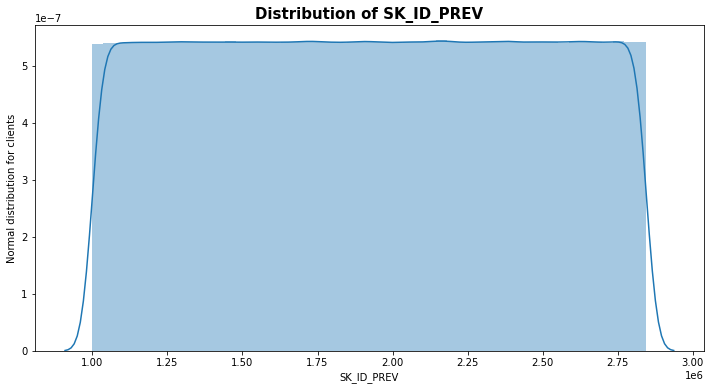

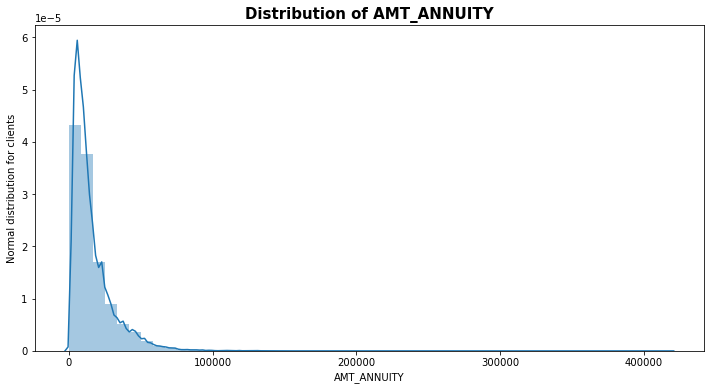

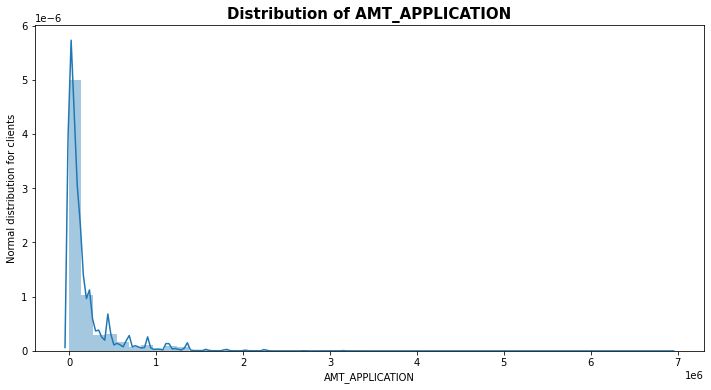

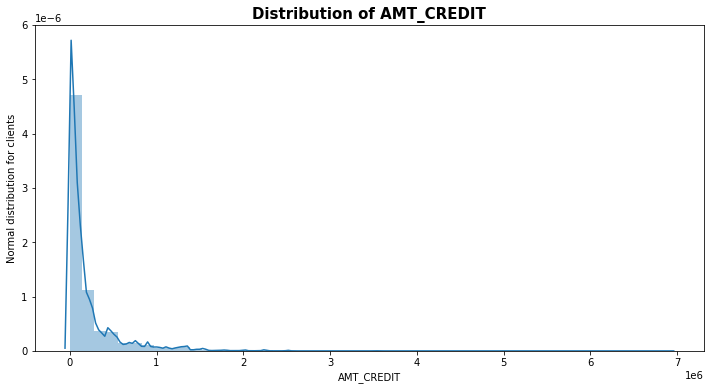

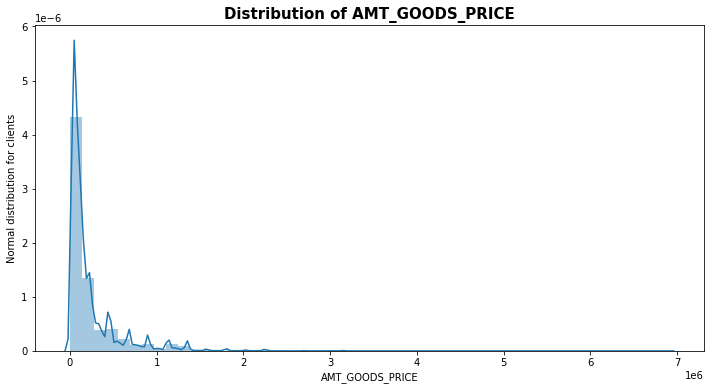

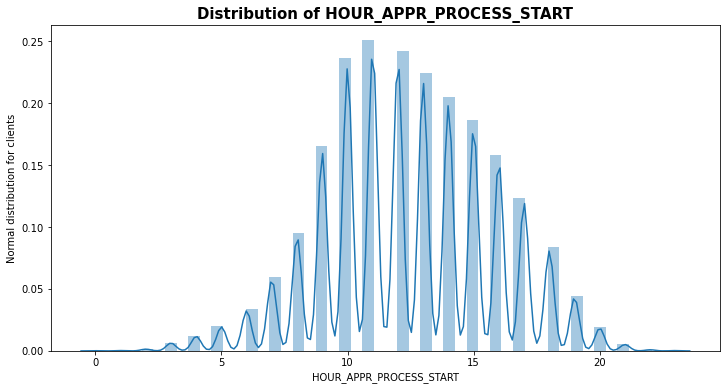

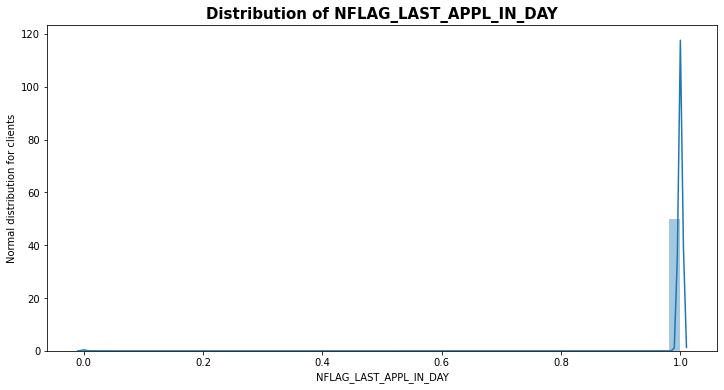

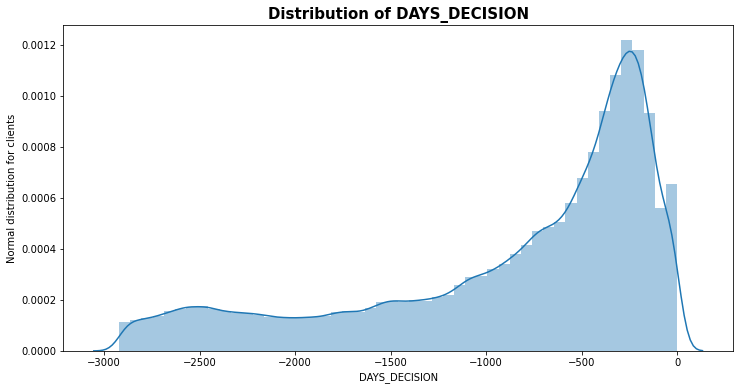

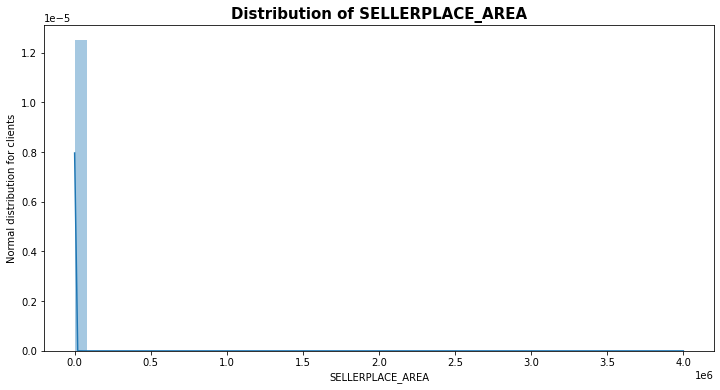

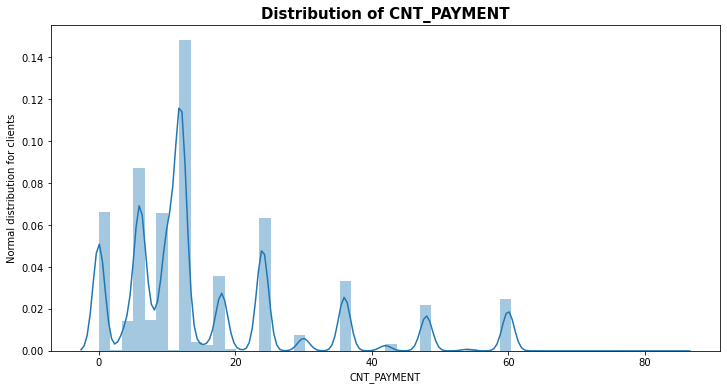

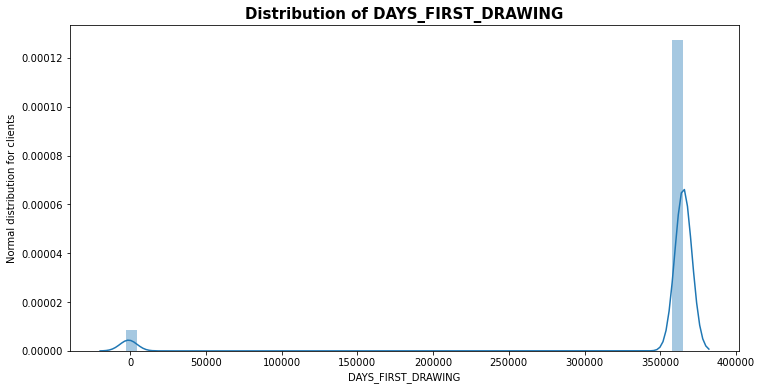

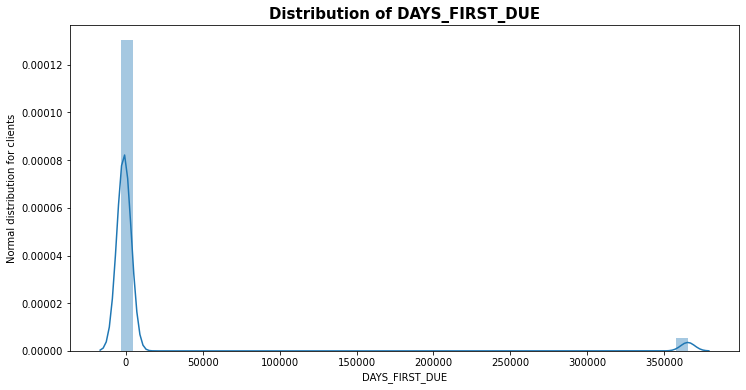

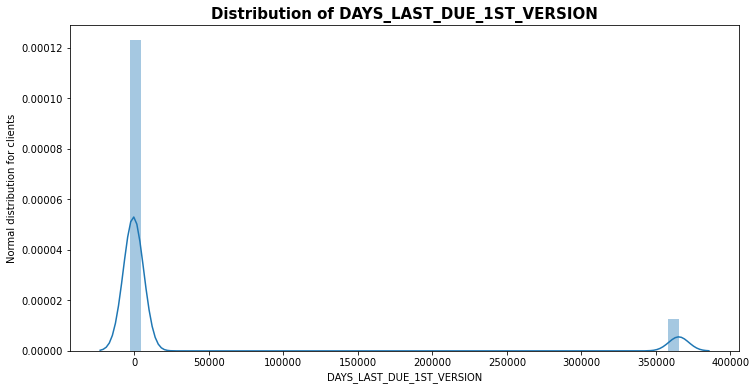

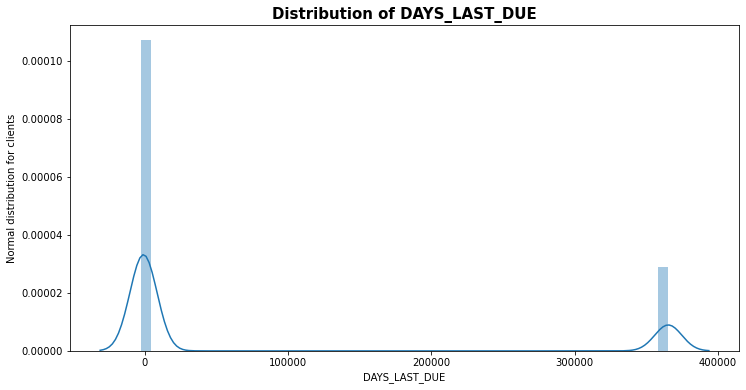

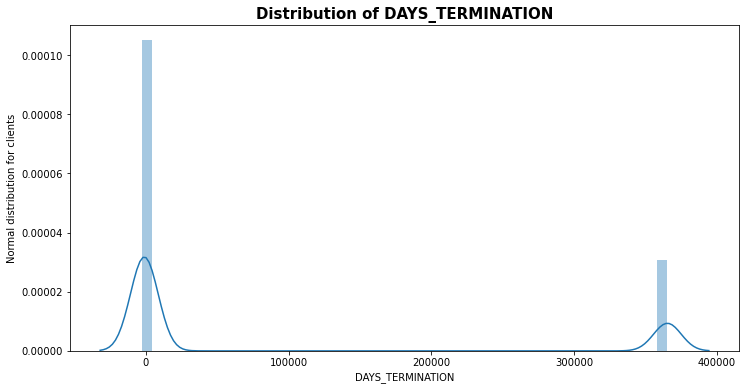

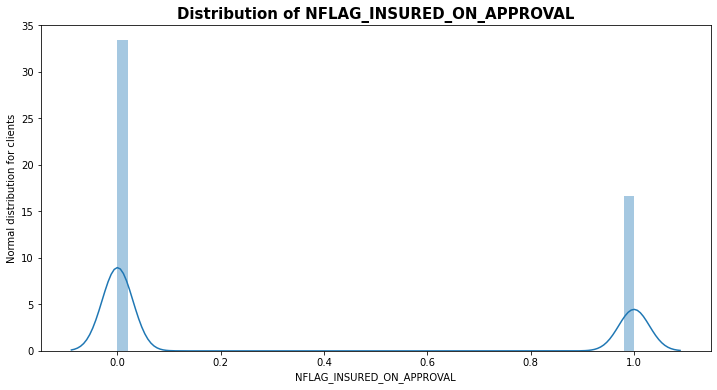

In [18]:
unnivariate_cont(continuous_columns)

In [19]:
def bivariate_cat_cat(variable,var_hue):
    plt.figure(figsize=(12,6))
    sns.countplot(variable,hue=var_hue, data=previous, palette= 'bright', order= previous[variable].value_counts().index, hue_order=previous[var_hue].value_counts().index)
    plt.title('Analysis of '+ '%s' %variable , weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Clients')
    plt.show()

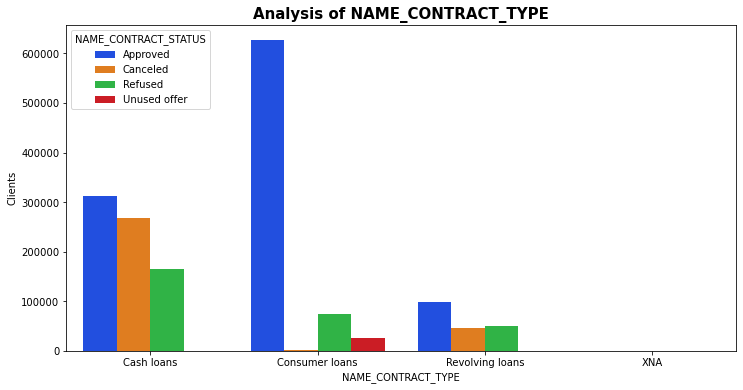

In [20]:
bivariate_cat_cat('NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS')

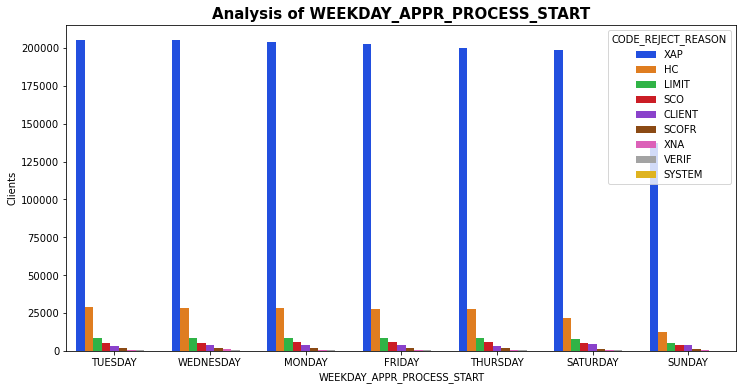

In [21]:
bivariate_cat_cat('WEEKDAY_APPR_PROCESS_START','CODE_REJECT_REASON')


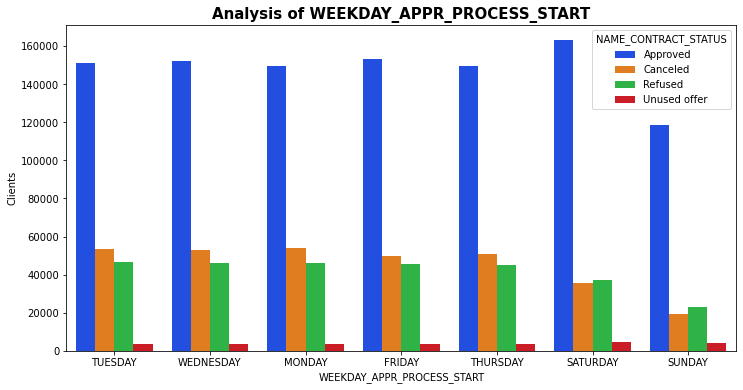

In [22]:
bivariate_cat_cat('WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS')

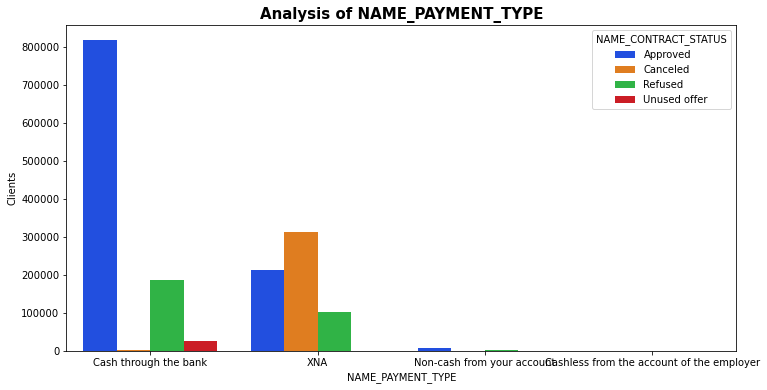

In [23]:
bivariate_cat_cat('NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS')

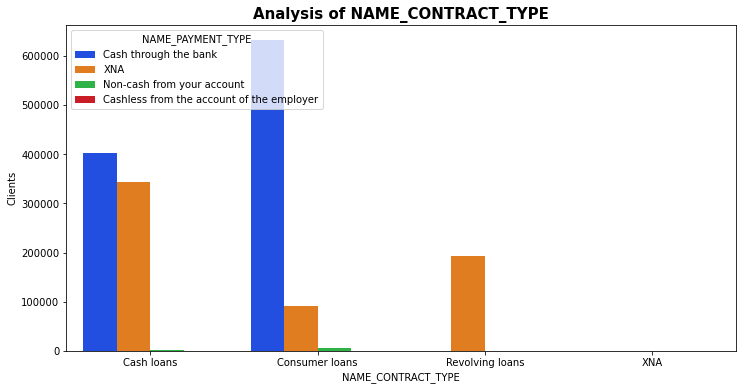

In [24]:
bivariate_cat_cat('NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE')

In [25]:
def bivariate_cat_cont(var_cat,var_cont):
    plt.figure(figsize=(13,8))
    sns.boxplot(x=var_cat,y=var_cont, data=previous, palette='bright', order= previous[var_cat].value_counts().index)
    plt.title('Analysis of '+ '%s' %var_cat, weight='heavy', fontsize=15)
    plt.xlabel(var_cat)
    plt.ylabel('%s' %var_cont+' for defaulters')
    plt.show()

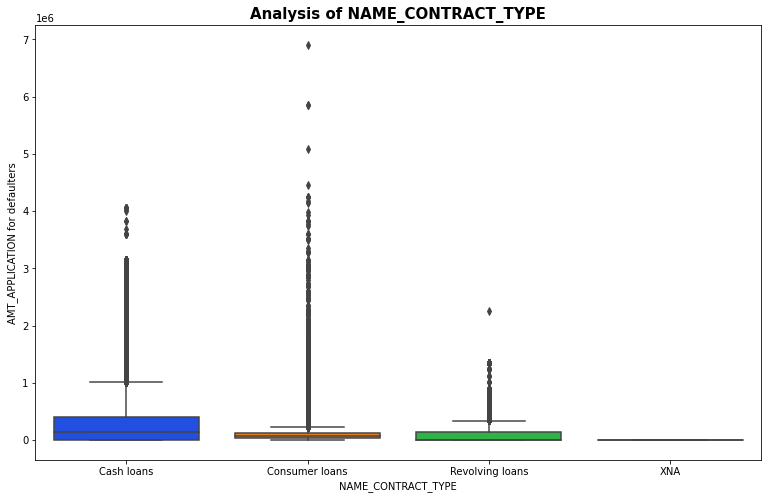

In [26]:
bivariate_cat_cont('NAME_CONTRACT_TYPE','AMT_APPLICATION')

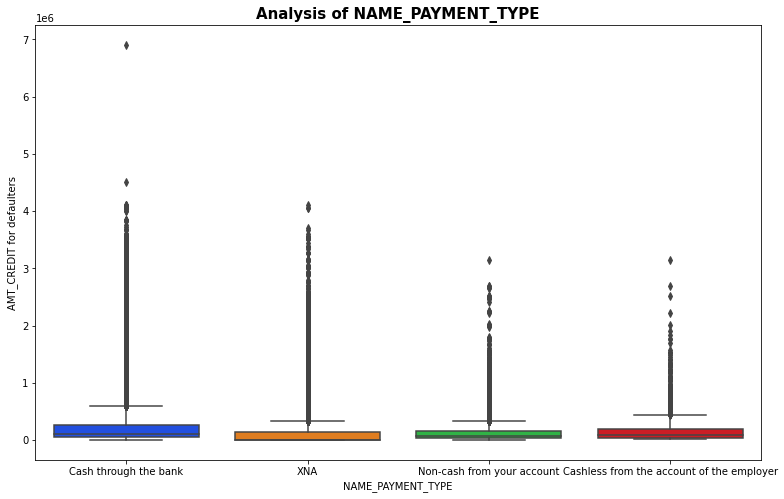

In [27]:
bivariate_cat_cont('NAME_PAYMENT_TYPE','AMT_CREDIT')

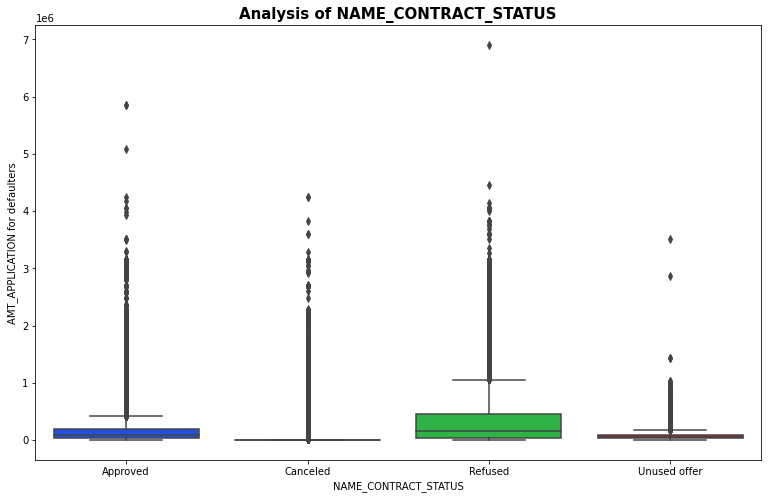

In [28]:
bivariate_cat_cont('NAME_CONTRACT_STATUS','AMT_APPLICATION')

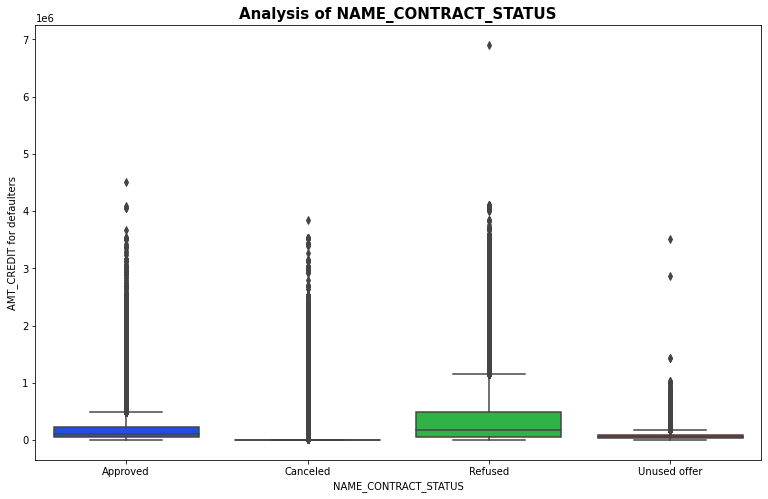

In [29]:
bivariate_cat_cont('NAME_CONTRACT_STATUS','AMT_CREDIT')

In [30]:
def bivariate_cont_cont(var_cont1,var_cont2):   
    plt.figure(figsize=(13,7))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=previous, palette='bright')
    plt.title('Analysis of '+ '%s' %var_cont1, weight='heavy', fontsize=15)
    plt.ylabel('Analysis of '+ '%s' %var_cont2)
    xIQR=1.5*(previous[var_cont1].quantile(.75)-previous[var_cont1].quantile(.25))
    xlowerlim=previous[var_cont1].quantile(.25)-xIQR
    xupperlim=previous[var_cont1].quantile(.75)+xIQR
    yIQR=1.5*(previous[var_cont2].quantile(.75)-previous[var_cont2].quantile(.25))
    ylowerlim=previous[var_cont2].quantile(.25)-yIQR
    yupperlim=previous[var_cont2].quantile(.75)+yIQR
    plt.show()


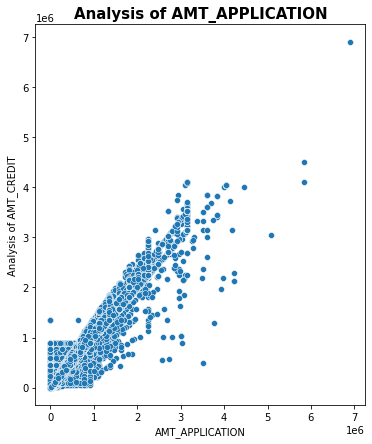

In [31]:
bivariate_cont_cont('AMT_APPLICATION','AMT_CREDIT')

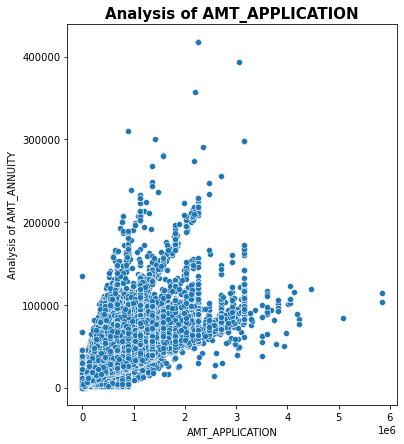

In [32]:
bivariate_cont_cont('AMT_APPLICATION','AMT_ANNUITY')

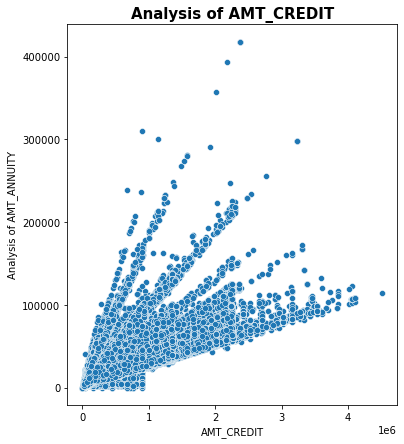

In [33]:
bivariate_cont_cont('AMT_CREDIT','AMT_ANNUITY')

In [34]:
def corr_heatmap(variable):
    plt.figure(figsize=(13,9))
    corr_lation = variable.corr()
    masking=np.triu(np.ones(corr_lation.shape)).astype(np.bool)
    sns.heatmap(corr_lation,annot=True,mask=masking,linewidths=.10,cmap="Spectral")
    plt.show()
    #Steps to obtain the top correlation.
    indices = np.where(corr_lation > -1)
    indices = [(corr_lation.index[x], corr_lation.columns[y],abs(corr_lation.iloc[x,y])) for x, y in zip(*indices) if x != y and x < y]
    all=sorted(indices, key=lambda x: x[2],reverse=True)
    print("Ten Correlations are:")
    for i in range(0,6):
        print('%d. '%(i+1)+all[i][0]+' and '+all[i][1])

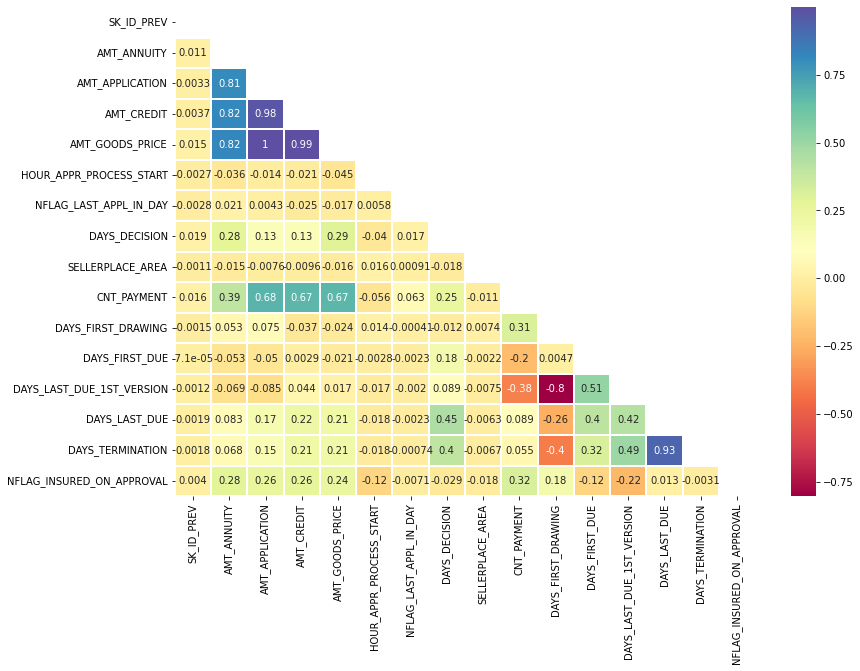

Ten Correlations are:
1. AMT_APPLICATION and AMT_GOODS_PRICE
2. AMT_CREDIT and AMT_GOODS_PRICE
3. AMT_APPLICATION and AMT_CREDIT
4. DAYS_LAST_DUE and DAYS_TERMINATION
5. AMT_ANNUITY and AMT_GOODS_PRICE
6. AMT_ANNUITY and AMT_CREDIT


In [35]:
corr_heatmap(continuous_columns)

In [36]:
X = pd.DataFrame(previous)
Y = previous['NAME_CONTRACT_STATUS']

In [37]:
X = X.drop(columns = ['NAME_CONTRACT_STATUS', 'SK_ID_PREV', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 
                     'SELLERPLACE_AREA', 'NFLAG_INSURED_ON_APPROVAL', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
                     'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'CNT_PAYMENT'])
X.columns

Index(['NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [38]:
X.isnull().sum()*100/len(X)

NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
dtype: float64

In [39]:
X['PRODUCT_COMBINATION'] = X['PRODUCT_COMBINATION'].fillna(X['PRODUCT_COMBINATION'].mode())
one_hot_encoded = pd.get_dummies(X.select_dtypes(include=['object']))

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, one_hot_encoded], axis=1)

# Drop the original categorical columns
X.drop(X.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [40]:
X.columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Consumer loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_CONTRACT_TYPE_XNA',
       'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       ...
       'PRODUCT_COMBINATION_Cash X-Sell: low',
       'PRODUCT_COMBINATION_Cash X-Sell: middle',
       'PRODUCT_COMBINATION_POS household with interest',
       'PRODUCT_COMBINATION_POS household without interest',
       'PRODUCT_COMBINATION_POS industry with interest',
       'PRODUCT_COMBINATION_POS industry without interest',
       'PRODUCT_COMBINATION_POS mobile with interest',
       'PRODUCT_COMBINATION_POS mobile without interest',
       'PRODUCT_COMBINATION_POS other with interest',
       'PRODUCT_COMBINATION_POS others without interest'],
      dtype='object', length=136)

In [41]:
Y.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [42]:
previous['NAME_CONTRACT_STATUS'].replace("Canceled","Refused", inplace=True)
previous['NAME_CONTRACT_STATUS'].replace("Unused offer", "Refused", inplace=True)
previous['NAME_CONTRACT_STATUS'].value_counts()
X['AMT_CREDIT'] = X['AMT_CREDIT'].fillna(X['AMT_CREDIT'].mean())
X['AMT_GOODS_PRICE'] = X['AMT_GOODS_PRICE'].fillna(X['AMT_GOODS_PRICE'].mean())
X['AMT_ANNUITY'] = X['AMT_ANNUITY'].fillna(X['AMT_ANNUITY'].mean())
Y.value_counts()

Approved    1036781
Refused      633433
Name: NAME_CONTRACT_STATUS, dtype: int64

In [43]:
Y.replace("Approved", 1, inplace=True)
Y.replace("Refused", 0, inplace=True)
Y.replace('1', int(1))
Y.replace('0', int(0))
Y = Y.astype(int)
Y.unique()

array([1, 0])

In [44]:
X.head(5)

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,1730.430,17145.0,17145.0,17145.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,25188.615,607500.0,679671.0,607500.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15060.735,112500.0,136444.5,112500.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47041.335,450000.0,470790.0,450000.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,31924.395,337500.0,404055.0,337500.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Split the Dataset:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [46]:
# Choose a Model
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [47]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8111901649486594
Precision: 0.7902462692368522
Recall: 0.9474284685865978
F1-score: 0.8617283734091001
ROC-AUC: 0.7676986899244467


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9924830036851543
Precision: 0.9941477864834614
Recall: 0.9937402643749669
F1-score: 0.9939439836576796
ROC-AUC: 0.9920827050053164


In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9924830036851543
Precision: 0.9941477864834614
Recall: 0.9937402643749669
F1-score: 0.9939439836576796
ROC-AUC: 0.9920827050053164
